In [1]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
COLORS = sns.color_palette(palette='colorblind')

In [2]:
# df = pd.read_csv(os.getenv("DATA_URL"))
df = pd.read_csv('/app/data/2022-06-01-covid-data.csv')
df.sample(5)

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
92073,97199,LBR,Africa,Liberia,2021-01-18,1887.0,0.0,12.429,84.0,0.0,...,1.5,18.1,1.188,0.8,64.10,0.480,NaN,NaN,NaN,NaN
145887,154422,SXM,North America,Sint Maarten (Dutch part),2021-08-24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.95,NaN,NaN,NaN,NaN,NaN
117472,124288,NER,Africa,Niger,2021-02-02,4548.0,11.0,20.143,162.0,1.0,...,0.1,15.4,8.978,0.3,62.42,0.394,NaN,NaN,NaN,NaN
46888,48588,DOM,North America,Dominican Republic,2022-02-13,569446.0,422.0,976.143,4347.0,4.0,...,8.5,19.1,55.182,1.6,74.08,0.756,NaN,NaN,NaN,NaN
3138,3977,AND,Europe,Andorra,2021-12-18,20549.0,0.0,158.429,134.0,0.0,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN


In [3]:
# file_name = '../data/{0}-covid-data.csv'.format(
#     datetime.datetime.now().strftime('%Y-%m-%d'))
# df.to_csv(file_name)

In [4]:
# commons transformations
df.dropna(subset=['continent'], inplace=True)
df['date'] = df['date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))

In [5]:
df.shape

(179568, 68)

## Overall Situation for New Cases of Covid-19
Multi-set bar plot, Group by year and month
- X: months
- Y: number of cases

In [6]:
df.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smooth

In [7]:
columns_to_include = ['date', 'location', 'continent', 'total_cases', 'new_cases']
new_cases = df[columns_to_include].copy()

new_cases.set_index('date', inplace=True)
new_cases['month'] = new_cases.index.month
new_cases['year'] = new_cases.index.year

new_cases_per_month_n_country = new_cases.groupby(by=['year', 'month', 'location']).sum()
new_cases_per_month_n_country.head(10)

total_cases  new_cases
year month location                         
2020 1     Argentina          0.0        0.0
           Australia         38.0        9.0
           Cambodia           5.0        1.0
           Canada            30.0        4.0
           China          37897.0     9236.0
           Estonia            0.0        0.0
           Fiji               0.0        0.0
           Finland            3.0        1.0
           France            30.0        5.0
           Germany           18.0        5.0

In [8]:
# plot data for location = Italy
mask = new_cases_per_month_n_country.index.get_level_values(2) == 'Italy'
italy_new_cases = new_cases_per_month_n_country[mask]
italy_new_cases.reset_index(inplace=True)
italy_new_cases.head()

,year,month,location,total_cases,new_cases
0,2020,1,Italy,2.0,2.0
1,2020,2,Italy,3966.0,1126.0
2,2020,3,Italy,1209772.0,104664.0
3,2020,4,Italy,4928524.0,99671.0
4,2020,5,Italy,6914863.0,27534.0


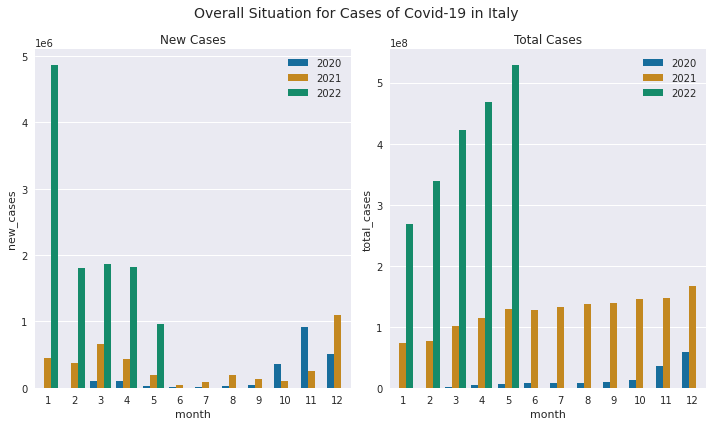

In [9]:
_ = plt.figure(figsize=[10,6])
plt.suptitle('Overall Situation for Cases of Covid-19 in Italy', fontsize=14)

plt.subplot(1,2,1)
sns.barplot(data=italy_new_cases, x='month', y='new_cases', 
            hue='year', palette=COLORS, ci=None)
plt.title('New Cases', fontsize=12)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.barplot(data=italy_new_cases, x='month', y='total_cases',
            hue='year', palette=COLORS, ci=None)
plt.title('Total Cases', fontsize=12)
plt.legend(loc='upper right')

plt.tight_layout()

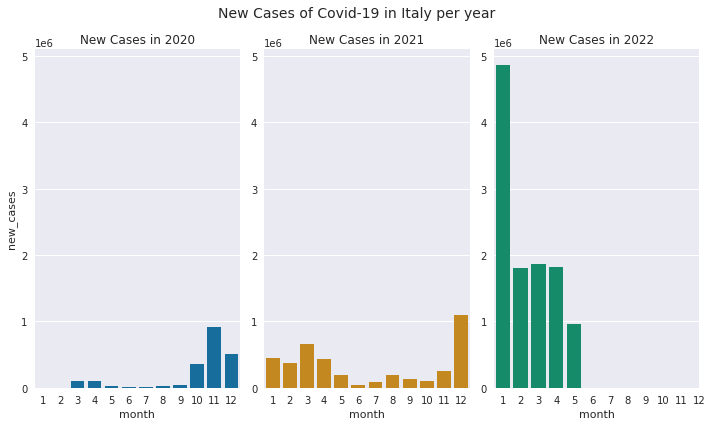

In [10]:
_ = plt.figure(figsize=[10,6])
plt.suptitle('New Cases of Covid-19 in Italy per year', fontsize=14)

ax1 = plt.subplot(1,3,1)
sns.barplot(data=italy_new_cases[italy_new_cases['year'] == 2020], 
            x='month', y='new_cases', 
            color=COLORS[0], ci=None)
plt.title('New Cases in 2020', fontsize=12)

ax2 = plt.subplot(1,3,2, sharey=ax1)
sns.barplot(data=italy_new_cases[italy_new_cases['year'] == 2021], 
            x='month', y='new_cases', 
            color=COLORS[1], ci=None)
plt.title('New Cases in 2021', fontsize=12)
ax2.set(ylabel=None)

ax3 = plt.subplot(1,3,3, sharey=ax1)
sns.barplot(data=italy_new_cases[italy_new_cases['year'] == 2022], 
            x='month', y='new_cases', 
            color=COLORS[2], ci=None)
plt.title('New Cases in 2022', fontsize=12)
plt.xticks(ticks=range(0,12), labels=range(1,13))
ax3.set(ylabel=None)

plt.tight_layout()

In [11]:
new_cases_per_month_n_country.reset_index(inplace=True)
new_cases_per_month_n_country.to_dict('records').__len__() *2

12058

In [12]:
# test data
test = pd.read_csv('/app/data/test-data.csv')

test.dropna(subset=['continent'], inplace=True)
test['date'] = test['date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))

columns_to_include = ['date', 'location', 'continent', 'total_cases', 'new_cases']
aux = test[columns_to_include].copy()

aux.set_index('date', inplace=True)
aux['month'] = aux.index.month
aux['year'] = aux.index.year

test_result = aux.groupby(by=['year', 'month', 'location']).sum()
test_result.reset_index(inplace=True)
test_result.to_dict('records')[0]

{'year': 2020,
 'month': 2,
 'location': 'Italy',
 'total_cases': 3.0,
 'new_cases': 0.0}

In [14]:
# functions to be tested
def get_new_cases_per_month_n_location(data: pd.DataFrame):
    data.dropna(subset=['continent'], inplace=True)
    data['date'] = data['date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))
    columns_to_include = ['date', 'location', 'continent', 'total_cases', 'new_cases']
    new_cases = data[columns_to_include].copy()
    new_cases.set_index('date', inplace=True)
    new_cases['month'] = new_cases.index.month
    new_cases['year'] = new_cases.index.year
    new_cases_per_month_n_country = new_cases.groupby(by=['year', 'month', 'location']).sum()
    new_cases_per_month_n_country.reset_index(inplace=True)
    return new_cases_per_month_n_country.to_dict('records')


get_new_cases_per_month_n_location(
    pd.read_csv('/app/data/test-data.csv'))[0]

{'year': 2020,
 'month': 2,
 'location': 'Italy',
 'total_cases': 3.0,
 'new_cases': 0.0}